In [1]:
import pandas as pd
df = pd.read_excel("dadosBTC.xlsx", index_col=0)

In [3]:
df

,Ação,Taxa %
0,AALR3,1.87
1,ABEV3,0.55
2,AGRO3,0.55
3,ALPA4,0.97
4,ALPK3,9.00
...,...,...
167,RADL3,0.55
168,RAIL3,0.55
169,RANI3,4.43
170,RAPT3,0.55


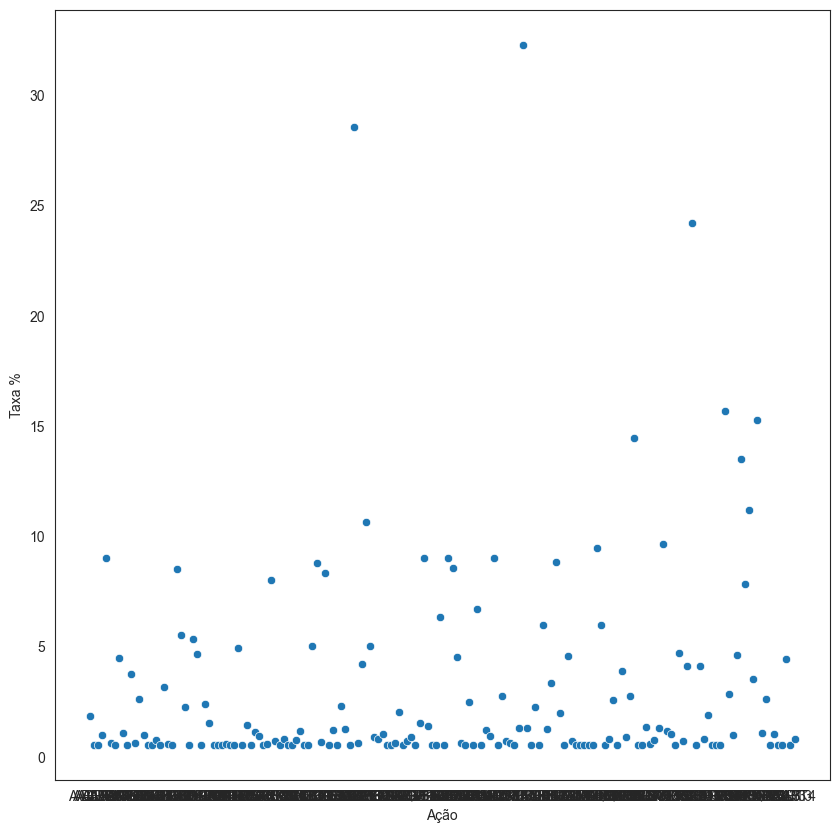

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
g = sns.scatterplot(x="Ação", y="Taxa %", 
                    data=df)
plt.show()

In [8]:
def calculaPercentil98(df):

    # Define os percentis para ver como os dados estão distribuídos
    description = df.describe(percentiles=[.25, .5, .75, .9, .95, .98, .99, .999])
    print( description)
    description_dict = description.to_dict()

    # Coleta o valor que delimita 98% das amostras no DataFrame
    data_cut = float(description_dict["Taxa %"]["98%"])
    
    # Seleciona apenas as amostras dentro do intervalo de 98%, removendo os outliers
    df98 = df[df["Taxa %"] <= data_cut]

    return df98

df = pd.read_excel("dadosBTC.xlsx", index_col=0)
df98 = calculaPercentil98(df)

           Taxa %
count  172.000000
mean     2.967093
std      4.684165
min      0.550000
25%      0.550000
50%      0.935000
75%      3.582500
90%      8.566000
95%     10.109000
98%     15.523600
99%     25.477300
99.9%   31.655590
max     32.290000


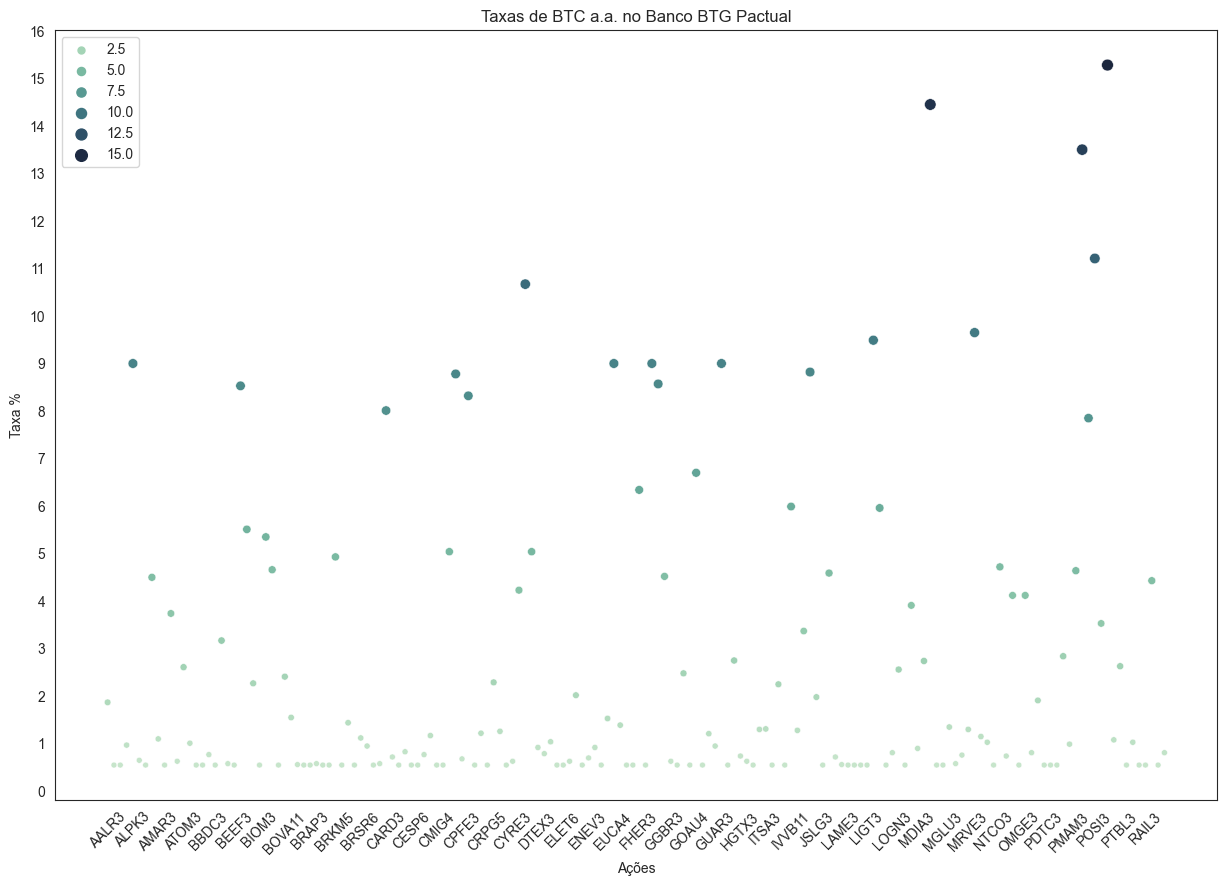

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Criando o ambiente do gráfico 
sns.set_style("white")
plt.figure(figsize=(15, 10))

# Gráfico de Dispersão
cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
g = sns.scatterplot(x="Ação", y="Taxa %", 
                    hue="Taxa %", size="Taxa %",
                    palette=cmap, data=df98) #df98 calculado anteriormente

# Ajusta rótulos
g.set_title("Taxas de BTC a.a. no Banco BTG Pactual")
g.set_xlabel("Ações")
g.yaxis.set_major_locator(ticker.MultipleLocator(1))

for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # Mantém apenas os rótulos múltiplos de 4 no eixo x
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

C:\Users\Luan Lima\AppData\Local\Temp\ipykernel_25392\3015206600.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(df98["Taxa %"], ax=ax,
C:\Users\Luan Lima\AppData\Local\Temp\ipykernel_25392\3015206600.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g2 = sns.distplot(df98["Taxa %"], ax

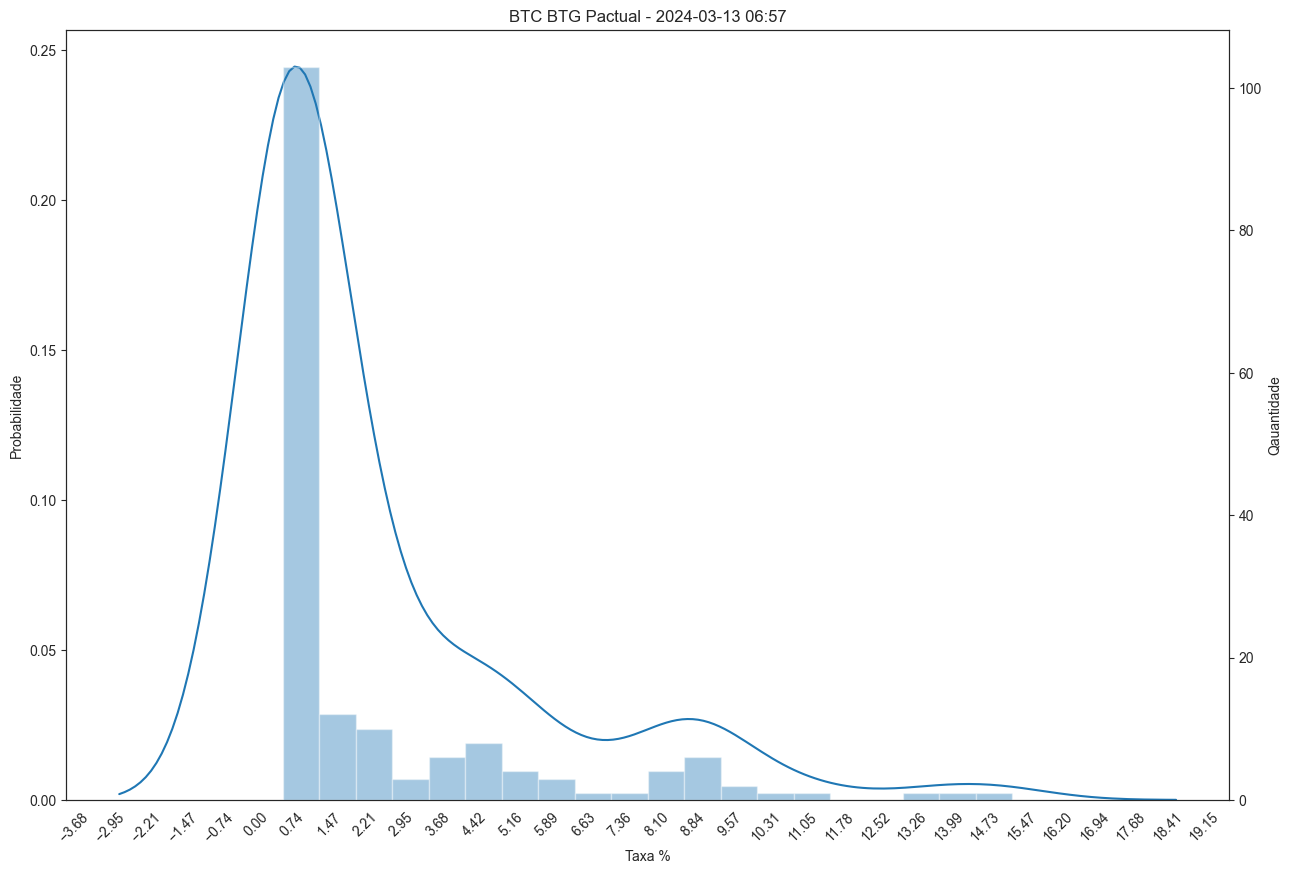

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

bins = 20

# Criando o ambiente do gráfico 
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Insere curva KDE (Kernel Density Estimation)
g1 = sns.distplot(df98["Taxa %"], ax=ax, 
                  kde=True, hist=False) 

# Insere histograma
ax_copy = ax.twinx()
g2 = sns.distplot(df98["Taxa %"], ax=ax_copy, kde=False, hist=True, 
             bins=bins, norm_hist=False)

# Ajusta rótulos
g1.set_ylabel("Probabilidade")
g2.set_ylabel("Qauantidade")
g2.set_title("BTC BTG Pactual - " + datetime.now().strftime("%Y-%m-%d %H:%M"))
g1.xaxis.set_major_locator(ticker.MultipleLocator((df98["Taxa %"].max()-df98["Taxa %"].min())/bins))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()